# Modules
To visualize data in Python, we will be using an external module called [plotnine](https://plotnine.readthedocs.io/en/stable/). Instead of importing the whole module, we will import only the objects that we need. We also need to import numpy and pandas, using the same aliases as before.

In [70]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, geom_boxplot, geom_bar, geom_histogram, geom_tile, geom_text, stat_smooth, facet_wrap, ggtitle, xlab, ylab, scale_fill_discrete, scale_x_discrete, theme, theme_matplotlib, theme_minimal, theme_xkcd

# Basic visualization
With plotnine, you can build a plot using only 2 lines of code:

1. **ggplot()**: this creates a plot object, and holds the details of which variables will be displayed on which axes
2. **geom**: this specifies the kind of plot that will be created

And that's it! This structure is called the grammar of graphics, and it is used by other plotting libraries in other languages, such as ggplot in R.

## Input data
To keep things simple, we will use an artificial dataset to start with. We can make this with pandas, as covered in the previous session:

In [3]:
example = pd.DataFrame([
    {"City":"Manchester", "Year":1980, "Rainfall":200},
    {"City":"Manchester", "Year":1990, "Rainfall":190},
    {"City":"Manchester", "Year":2000, "Rainfall":160},
    {"City":"Manchester", "Year":2010, "Rainfall":170},
    {"City":"London", "Year":1980, "Rainfall":100},
    {"City":"London", "Year":1990, "Rainfall":90},
    {"City":"London", "Year":2000, "Rainfall":60},
    {"City":"London", "Year":2010, "Rainfall":70},
])
example

,City,Year,Rainfall
0,Manchester,1980,200
1,Manchester,1990,190
2,Manchester,2000,160
3,Manchester,2010,170
4,London,1980,100
5,London,1990,90
6,London,2000,60
7,London,2010,70


## Scatter plot
The first plot we will create is a scatter plot, which uses the **geom_point()** geom. The important points to note in the code below are:

- the whole chunk of code needs to be encapsulated in brackets (I have put these on separate lines to make it easier to track which brackets contain which pieces of code)
- the first argument to **ggplot()** is always the dataframe containing the data to be plotted
- the second argument to **ggplot()** is always the **aes()** object, which contains the variables to be used for the *x axis*, *y axis*, plot *fill* and plot *colour*. These should always be specified in that order.

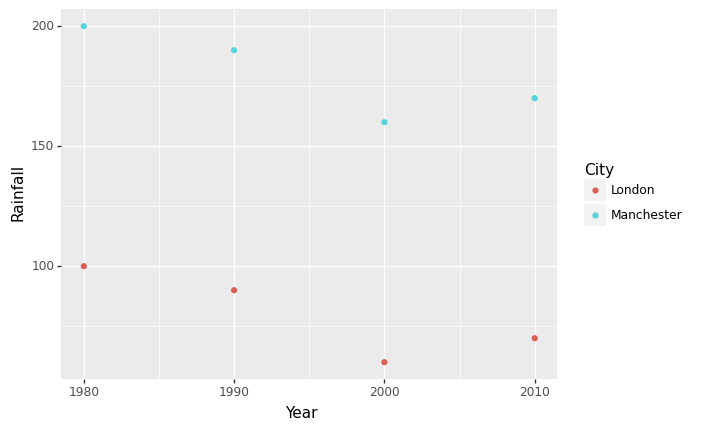

<ggplot: (-9223371904577809924)>

In [27]:
(
# create the plot object, and specify which variables should be placed on the x & y axes, and which should be used to fill and colour the plot
ggplot(example, aes("Year", "Rainfall", fill = "City", colour="City"))
    # specify a scatter plot
    + geom_point()
)

## Line plot
To create a line plot, we can use the same **ggplot()** call as we used for the scatter plot above, and this will keep the same variables for the *x*, *y*, *colour* and *fill*. The only thing that needs to change about the code is the **geom**. In this case, we will use **geom_line()**:

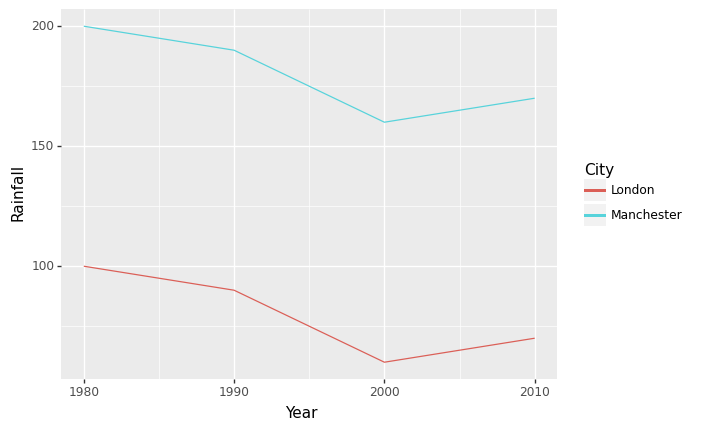

<ggplot: (-9223371904578069064)>

In [37]:
(
# the ggplot call is exactly the same as the scatter plot
ggplot(example, aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a line plot
    + geom_line()
)

## Box plot
To create a box plot, the only thing that needs to change about the code above is the **geom**. In this case, we will use **geom_box()**:

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


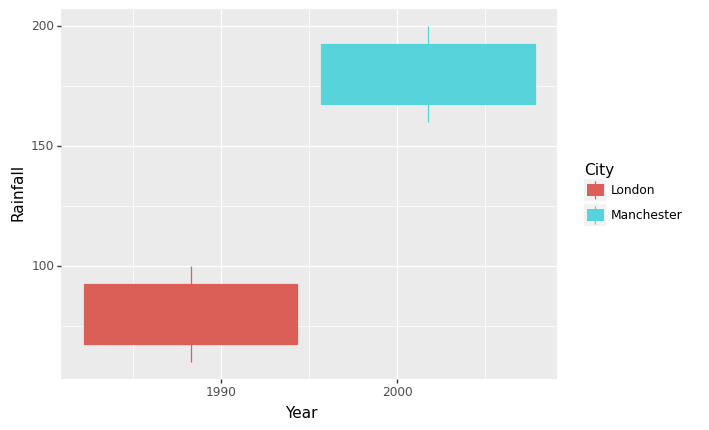

<ggplot: (-9223371904578429196)>

In [36]:
(
# the ggplot call is exactly the same as the scatter plot
ggplot(example, aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a box plot
    + geom_boxplot()
)

## Bar chart
To create a bar chart, we again only need to change the **geom**. In this case, we will use **geom_bar()**. However, by default **geom_bar()** will try to count the occurrences of the variable on the x axis, and plot a histogram. To override this and make **geom_bar()** plot the raw values of the y axis variable, we use the *stat* argument:

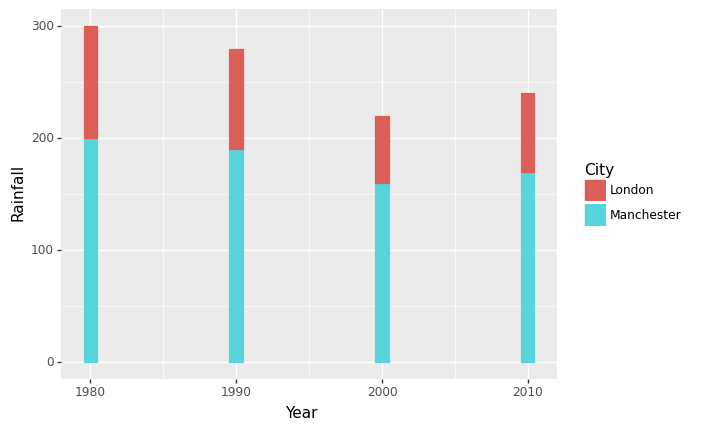

<ggplot: (-9223371904577790728)>

In [29]:
(
# the ggplot call is exactly the same as the scatter plot
ggplot(example, aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a bar chart
    + geom_bar(stat="identity")
)

By default **geom_bar()** stacks the bars for the same x axis variable on top of each other, but we can place them next to each other by using the *position* argument:

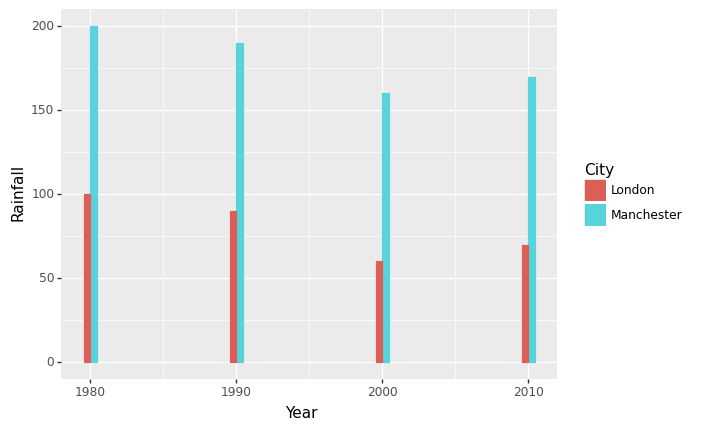

<ggplot: (-9223371904578327288)>

In [38]:
(
# the ggplot call is exactly the same as the scatter plot
ggplot(example, aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a bar chart
    + geom_bar(stat="identity", position="dodge")
)

## Histograms
Histograms can be very useful to visualize the distribution of a variable. To generate a histogram, we use **geom_histogram**. An important difference between this plot and the previous plots is that for histograms, we only specify the x axis variable within the **aes()** object, and we leave out the y axis variable:

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


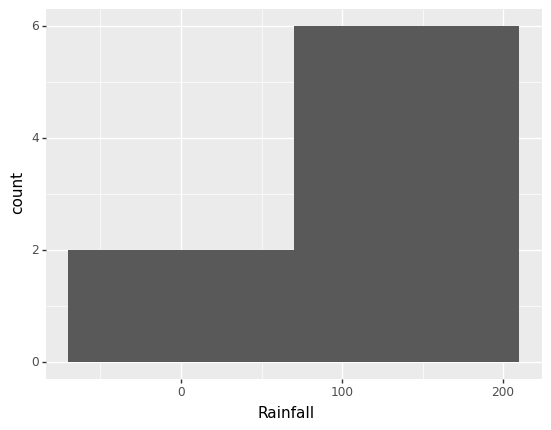

<ggplot: (-9223371919048435388)>

In [30]:
(
# the aes object contains only the variable that will be plotted on the x axis i.e. the one for which we want to generate a distribution
ggplot(example, aes("Rainfall"))
    # specify a histogram
    + geom_histogram()
)

# Advanced visualization

## Input data
To create some more advanced plots, we will use a more complex dataset: the clinical and expression data from the metabric project. If you have cloned the course materials repository from GitHub, you already have this file. First we will read the data in as a pandas dataframe, using **dropna()** to remove any rows with missing data, and then print out the column names and the data types that they hold by calling the **dtypes** attribute.

In [37]:
metabric = pd.read_csv("../data/metabric_clinical_and_expression_data.csv").dropna()
metabric.dtypes

Patient_ID                        object
Cohort                             int64
Age_at_diagnosis                 float64
Survival_time                    float64
Survival_status                   object
Vital_status                      object
Chemotherapy                      object
Radiotherapy                      object
Tumour_size                      float64
Tumour_stage                     float64
Neoplasm_histologic_grade        float64
Lymph_nodes_examined_positive      int64
Lymph_node_status                  int64
Cancer_type                       object
ER_status                         object
PR_status                         object
HER2_status                       object
HER2_status_measured_by_SNP6      object
PAM50                             object
3-gene_classifier                 object
Nottingham_prognostic_index      float64
Cellularity                       object
Integrative_cluster               object
Mutation_count                   float64
ESR1            

## Layered plots
As shown in the last section, a variety of simple plots can be generated by changing just the **geom**. However, we can construct more complex plots by layering different **geoms** on top of each other. This is particularly useful when we want to highlight a broad pattern in a noisy dataset: we can use one layer to display a line to visualize a model fit to the data, and another layer to show the raw data in the background. There are two things worth noting here:
1. By passing the *colour* and *size* arguments to **geom_point()** we can specify the colour and size of the points
2. We are using the **stat_smooth()** layer to plot a line of model fit on top of the raw data

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


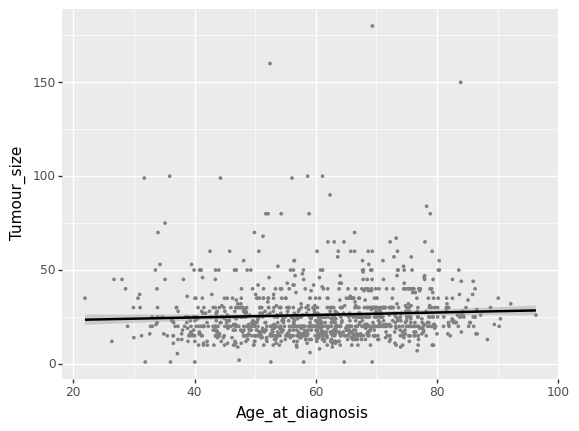

<ggplot: (-9223371895390826236)>

In [38]:
(
ggplot(metabric, aes("Age_at_diagnosis", "Tumour_size"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth()
)

## Faceted plots
When a large dataset contains a discrete variable, it can be useful to generate separate plots for each value of the discrete variable, so that we can tease apart patterns that might only be present in a subset of the data. For example, patients in the metabric dataset are each assigned a vital status, but each vital status might have a different tumour size distribution. In plotnine, separate plots can be generated by creating a **faceted** plot, where each facet represents a different subset of the data. To do this, we add the **facet_wrap()** parameter to the plot. The arguments that we pass the **facet_wrap()** are very important:
1. The first argument must always be the variable tha we want to generate separate plots for, and we must always add a "~" before it
2. We can use the *scales* argument to make the range of the x axis, y axis, or both axes independent of each other. The default is to use the same axis ranges for all facets, but when there is wide variation in a variable it can be useful to make them independent. In this case there are far fewer diamonds of a Fair cut than any others, so specifying independent y axis ranges allows us to see the Fair diamond price distribution more clearly
3. We can use the *ncol* argument to specify the number of columns for the plot. By default the plots will be placed side-by-side until there is no more horizontal space, but we can place them on top of each other by specifying one column

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 72'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


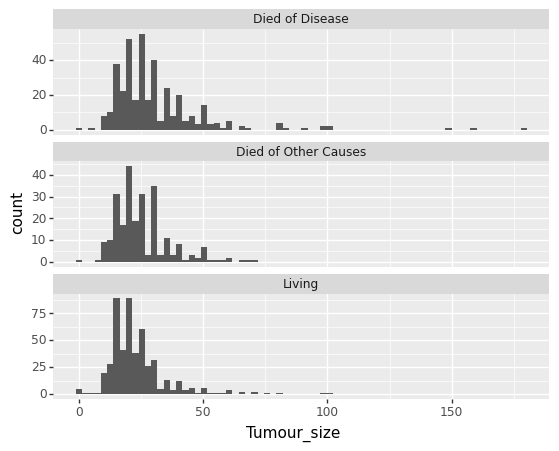

<ggplot: (-9223371895393359532)>

In [42]:
(
ggplot(metabric, aes("Tumour_size"))
 + geom_histogram()
 + facet_wrap("~Vital_status", scales="free_y", ncol=1)
)

## Heat maps
When we want to explore the relationship between 2 discrete variables and a continuous variable, a heatmap can be very useful. We use **geom_tile()** to generate a different block for each combination of the discrete variables, and use the *fill* argument in the **aes()** object to specify which continuous variable to use for colouring the heatmap. It is worth noting in the example below that we can filter the dataset within the **ggplot()** call:

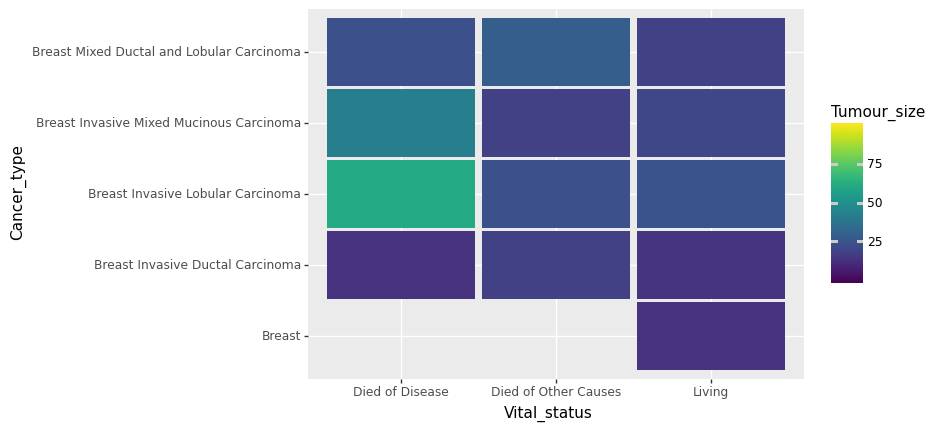

<ggplot: (-9223371895393160944)>

In [40]:
# we can see from the histograms above that there are a few very large tumours, so we will filter these out as we pass the data into the plot
(
ggplot(metabric[metabric["Tumour_size"]<100], aes("Vital_status", "Cancer_type", fill="Tumour_size"))
 + geom_tile(aes(width=0.95, height=0.95))
)

## Nested plots
In complex datasets there may be a relationship between two variables that differs according to the value of a third value. To visualize this, we can plot one variable on the x axis, another variable on the y axis, and use the *fill* parameter in the **aes()** object to split the x axis by a third variable. For example, we can compare the mutation count between different vital statuses, each subdivided by cancer type:

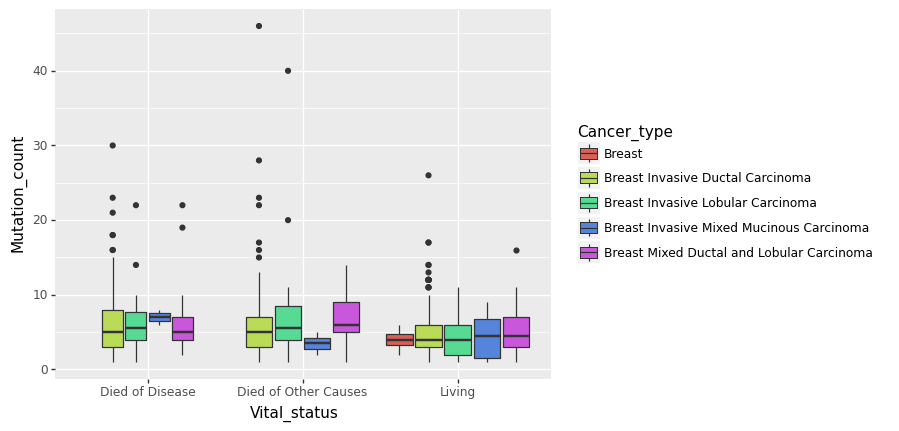

<ggplot: (-9223371895391377372)>

In [57]:
(
ggplot(metabric, aes("Vital_status", "Mutation_count", fill="Cancer_type"))
    + geom_boxplot()
)

## Plot formatting
We often want to make specific changes to the format of our plots, and plotnine offers enormous flexibility for this. In the nested plot above, we may want to add a title, remove the underscores in the axes and legend titles, and change the order of the vital statuses. We can make these changes by specifying the following objects:
- *ggtitle*: add a title to the plot
- *xlab*: specify the x axis
- *ylab*: specify the y axis
- *scale_fill_discrete*: control the name, order or colours of the variable used to fill the plot
- *scale_x_discrete*: control the name, order or colours of the variable on the x axis. By setting the *limits* parameter to a list, we can specify the order of the vital statuses

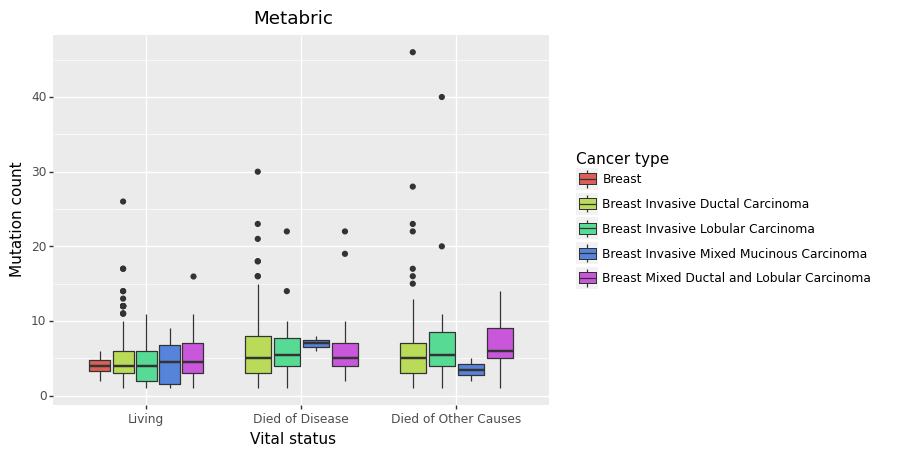

<ggplot: (-9223371895390820676)>

In [72]:
(
ggplot(metabric, aes("Vital_status", "Mutation_count", fill="Cancer_type"))
    + geom_boxplot()
    + ggtitle("Metabric")
    + xlab("Vital status")
    + ylab("Mutation count")
    + scale_fill_discrete(name = "Cancer type")
    + scale_x_discrete(limits=["Living", "Died of Disease", "Died of Other Causes"])
)

## Themes
In any plot generated by plotnine, many cosmetic details are controlled by the **theme**, including the font, background colour, line thicknesses etc. plotnine comes with a number of pre-defined themes, which allow us to make dramatic changes to how a plot looks by adding just one more line to our existing plotting code. Let's go back to the plot of age at diagnosis versus tumour size: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 20 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


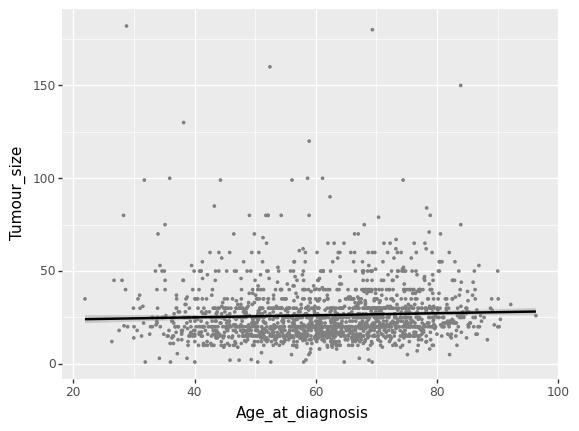

<ggplot: (-9223371895390750716)>

In [32]:
(
ggplot(metabric, aes("Age_at_diagnosis", "Tumour_size"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth()
)

By using **theme_minimal()** we can remove the minor gridlines, grey background, and axis lines

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 20 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


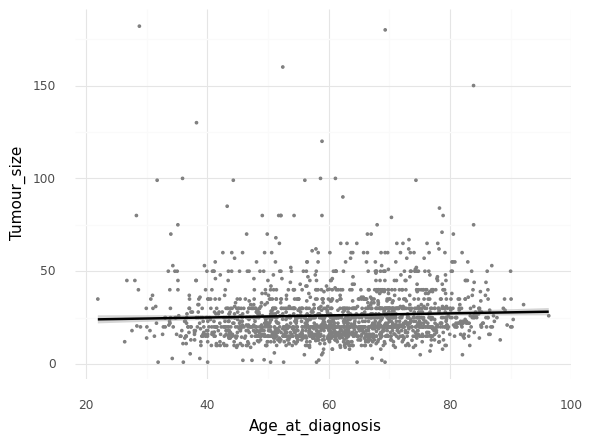

<ggplot: (-9223371895390035240)>

In [33]:
(
ggplot(metabric, aes("Age_at_diagnosis", "Tumour_size"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth()
 + theme_minimal()
)

**theme_matplotlib()** removes the gridlines and grey background, and add tickmarks and a border to the plot

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  rcParams[key] = val
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  rcParams[key] = val
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  rcParams[key] = val
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The verbose.

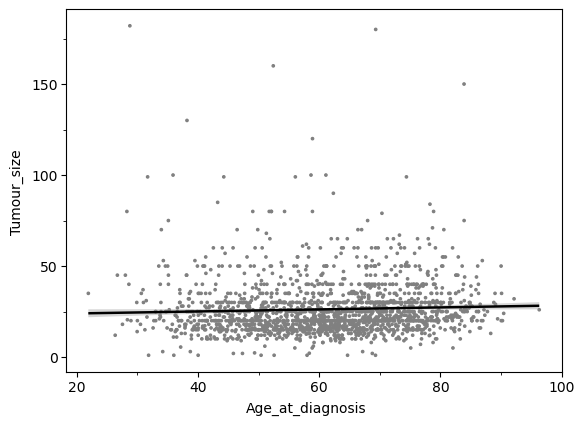

<ggplot: (-9223371895390033500)>

In [34]:
(
ggplot(metabric, aes("Age_at_diagnosis", "Tumour_size"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth()
 + theme_matplotlib()
)

**theme_xkcd()** gives the plot a hand-drawn feel, following the style of the [xkcd webcomic](https://xkcd.com/)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 20 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


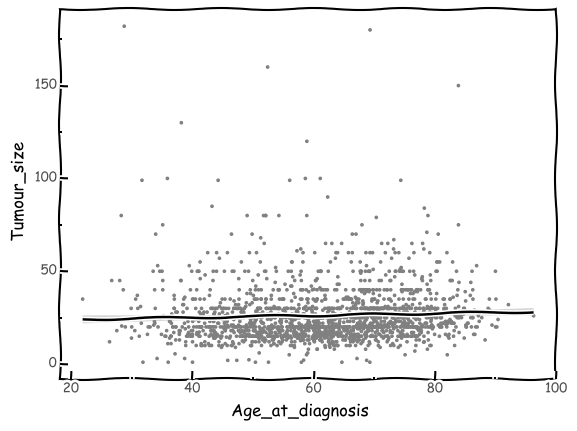

<ggplot: (-9223371895389879488)>

In [35]:
(
ggplot(metabric, aes("Age_at_diagnosis", "Tumour_size"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth()
 + theme_xkcd()
)

## Saving plots
Once we have produced a plot, we usually want to save it as a separate file. In Python, we can do this by assigning the **ggplot()** call to a variable, and then calling the **.save()** method on this variable. The first argument to **save()** is always the file name (or full file path), with the file type determined by the file name ending. We can also specify the height and width of the plot, and the units of measurement for these dimensions.

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 100.0 x 100.0 mm image.
  from_inches(height, units), units), PlotnineWarning)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: metabric_age_size.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  rcParams[key] = val
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  rcParams[ke

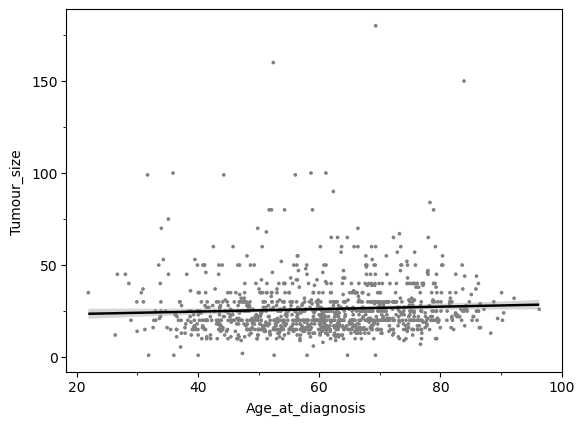

<ggplot: (-9223371895393184096)>

In [75]:
age_vs_size = (
ggplot(metabric, aes("Age_at_diagnosis", "Tumour_size"))
 + geom_point(colour="grey", size=0.5)
 + stat_smooth()
 + theme_matplotlib()
)
age_vs_size.save("metabric_age_size.svg", height=100, width=100, units="mm")
age_vs_size

## Further reading
In this session we have seen that plotnine can be used to generate many different plots with very little code. However, we have just scratched the surface of what is possible with this package, and with data visualization in Python more generally. There are many resources that you can use to extend your Python data vizualization skills:
- to see the full range of plot types that can be generated with plotnine, see the [plotnine gallery](https://plotnine.readthedocs.io/en/stable/gallery.html)
- for full details of how each plotnine geom and object works, see the [plotnine API documentation](https://plotnine.readthedocs.io/en/stable/api.html)
- if you want to generate bespoke plots with full control over each plotting element, take a look at the [matplotlib](https://matplotlib.org/) library

# Exercises
## Exercise 1

## Exercise 2

## Exercise 3